In [3]:
import pandas as pand
from google.colab import files
fileUpload = files.upload()

dataframe = pand.read_csv("electricityConsumptionAndProductioction.csv");
print(dataframe.head())

Saving electricityConsumptionAndProductioction.csv to electricityConsumptionAndProductioction.csv
              DateTime  Consumption  Production  ...  Coal  Solar  Biomass
0  2019-01-01 00:00:00         6352        6527  ...  1744      0       30
1  2019-01-01 01:00:00         6116        5701  ...  1641      0       30
2  2019-01-01 02:00:00         5873        5676  ...  1616      0       30
3  2019-01-01 03:00:00         5682        5603  ...  1558      0       30
4  2019-01-01 04:00:00         5557        5454  ...  1458      0       30

[5 rows x 10 columns]


In [4]:
# date time format of the input dataset that we have is of the form 2019-01-01 00:00:00 and we want it to be
dataframe['DateTime'] = pand.to_datetime(dataframe['DateTime'])   # convert to datetime object
dataframe.set_index('DateTime', inplace=True)
print(dataframe.head())

                     Consumption  Production  Nuclear  ...  Coal  Solar  Biomass
DateTime                                               ...                      
2019-01-01 00:00:00         6352        6527     1395  ...  1744      0       30
2019-01-01 01:00:00         6116        5701     1393  ...  1641      0       30
2019-01-01 02:00:00         5873        5676     1393  ...  1616      0       30
2019-01-01 03:00:00         5682        5603     1397  ...  1558      0       30
2019-01-01 04:00:00         5557        5454     1393  ...  1458      0       30

[5 rows x 9 columns]


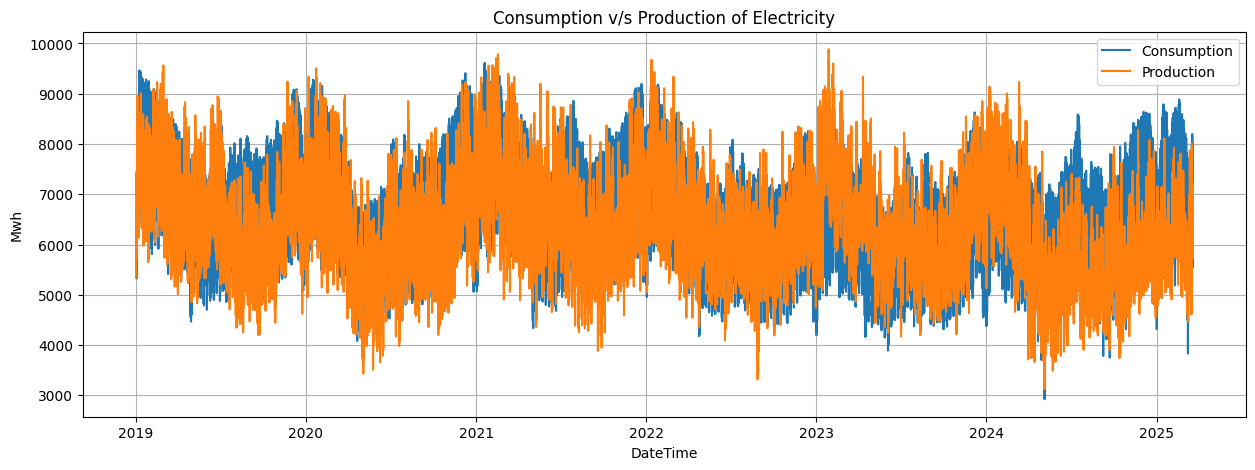

In [5]:
# visualisation of the above data
import matplotlib.pyplot as timeseriesplt
timeseriesplt.figure(figsize = (15, 5))
timeseriesplt.plot(dataframe['Consumption'], label = 'Consumption', linestyle = '-')
timeseriesplt.plot(dataframe['Production'], label = 'Production', linestyle = '-')
timeseriesplt.title('Consumption v/s Production of Electricity')
timeseriesplt.xlabel('DateTime')
timeseriesplt.ylabel('Mwh')
timeseriesplt.legend()        # small box that shows what each color represents.
timeseriesplt.grid(True)
timeseriesplt.show()


In [6]:
!pip install statsmodels

In [7]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(dataframe['Consumption'])   # this applies ADF on consumption
print("ADF Statistic: ", result[0])
print("p-value obtained: ", result[1])
print("Critical Values : ")
for k, v in result[4].items():
  print("\t", k, ":", v)

if result[1] <= 0.05:
  print("Data is stationary. Here p<=0.05 ")
else:
  print("Data is not stationary. Here p > 0.05 ")

ADF Statistic:  -14.412672382263958
p-value obtained:  8.155424801128915e-27
Critical Values : 
	 1% : -3.4304708554682284
	 5% : -2.861593415724349
	 10% : -2.5667984314078804
Data is stationary. Here p<=0.05 


In [1]:
!pip install statsmodels

In [11]:
from statsmodels.tsa.arima.model import ARIMA
mdel = ARIMA(dataframe['Consumption'], order = (1, 0, 1))
model_fit = mdel.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:            Consumption   No. Observations:                54170
Model:                 ARIMA(1, 0, 1)   Log Likelihood             -368954.814
Date:                Sun, 25 May 2025   AIC                         737917.629
Time:                        22:10:25   BIC                         737953.229
Sample:                             0   HQIC                        737928.739
                              - 54170                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       6526.4636     27.649    236.051      0.000    6472.274    6580.654
ar.L1          0.9414      0.002    562.334      0.000       0.938       0.945
ma.L1          0.6320      0.002    260.945      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


54170    6256.916123
54171    6272.708860
54172    6287.576303
54173    6301.572666
54174    6314.748985
54175    6327.153305
54176    6338.830859
54177    6349.824227
54178    6360.173495
54179    6369.916402
54180    6379.088474
54181    6387.723156
54182    6395.851933
54183    6403.504447
54184    6410.708602
54185    6417.490666
54186    6423.875371
54187    6429.885997
54188    6435.544461
54189    6440.871397
54190    6445.886229
54191    6450.607243
54192    6455.051653
54193    6459.235667
54194    6463.174540
54195    6466.882634
54196    6470.373473
54197    6473.659784
54198    6476.753550
54199    6479.666053
54200    6482.407914
54201    6484.989129
54202    6487.419111
54203    6489.706721
54204    6491.860300
54205    6493.887702
54206    6495.796319
54207    6497.593110
54208    6499.284627
54209    6500.877039
54210    6502.376151
54211    6503.787431
54212    6505.116024
54213    6506.366775
54214    6507.544245
54215    6508.652728
54216    6509.696264
54217    6510

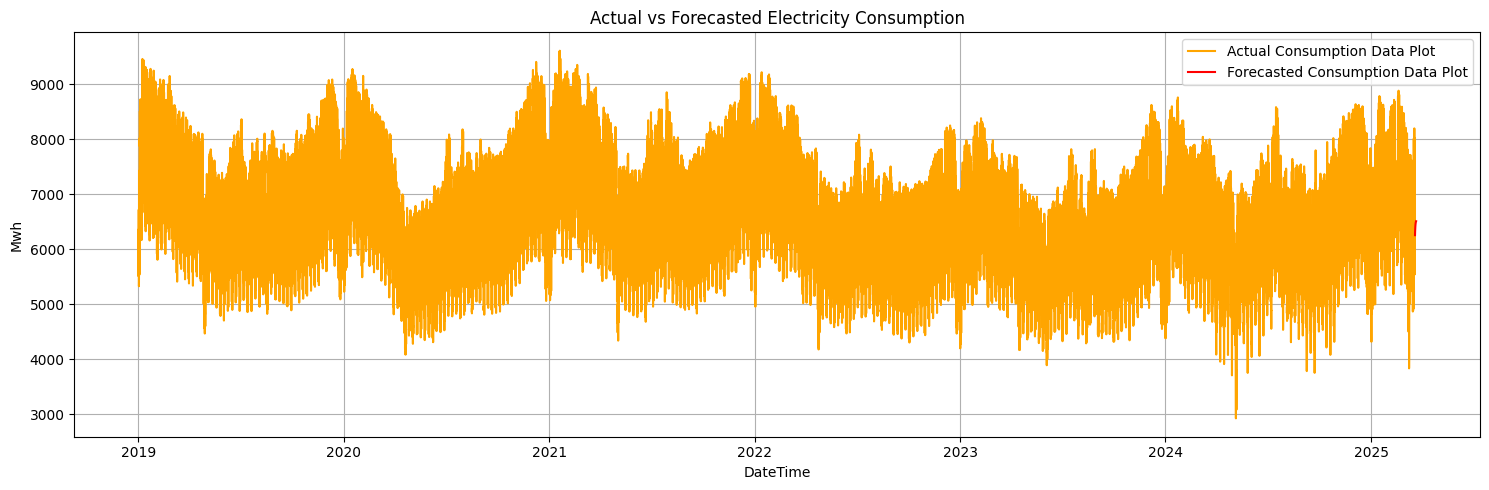

In [23]:
import matplotlib.pyplot as plt
forecast_points = 48
forecastData = model_fit.forecast(steps = forecast_points)
print(forecastData)

# rownumber eleccons

# Create future datetime index
last_datetime = dataframe.index[-1]
future_dates = [last_datetime + pand.Timedelta(hours=i+1) for i in range(forecast_points)]

# Plot
plt.figure(figsize=(15, 5))
plt.plot(dataframe['Consumption'], label='Actual Consumption Data Plot', color='orange')
plt.plot(future_dates, forecastData, label='Forecasted Consumption Data Plot', color='red')

plt.title('Actual vs Forecasted Electricity Consumption')
plt.xlabel('DateTime')
plt.ylabel('Mwh')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()